# visualization

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

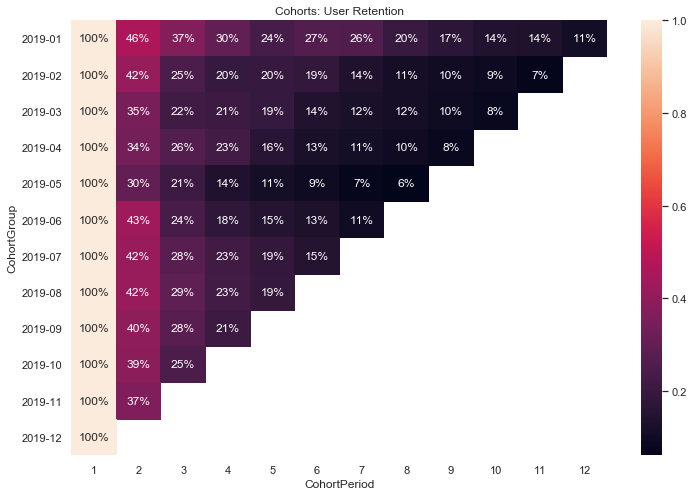

In [6]:
df_visual = pd.read_csv('D:/DATA SCIENCE/cari sendiri/Preliminary-Test-master/Data Visualization/dataset.csv')
df_visual['order_period'] = pd.to_datetime(df_visual['order_date']).dt.to_period('M')

#Determine the user's cohort group
df_visual.set_index('user_id', inplace=True)
df_visual['CohortGroup'] = pd.to_datetime(df_visual.groupby(level=0)['order_date'].min()).dt.to_period('M')

df_visual.reset_index(inplace=True)

grouped = df_visual.groupby(['CohortGroup', 'order_period'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)

#knowing the cohort period
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)

# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

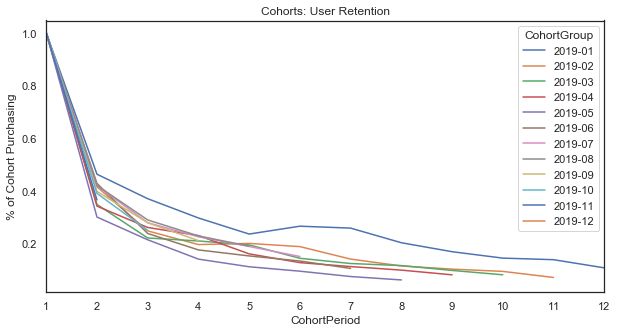

In [7]:
user_retention.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

cohort analysis itself is the matrix for knowing the user behaviour in each period (months). The business insight that I got from this matrix is, the customer which start having the activity in kulina from january has the slowest decreasing than customer which start having the activity in kulina in other months, which means, they (january customer) are the most loyal customer than others. 